# ML Fall22 - Movie Dataset Preprocessing

### Loading dependancies

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import ipdb
import json

In [2]:
DATA_lg = "../../data/full_metadata_tmdb.csv"
DATA_sm = "../../data/tmdb_details_scraped.csv"
Prad_DATA = "../cleaned_metadata.csv"

data = pd.read_csv(Prad_DATA)

## Step 1: Dropping Low Information Columns

In [3]:
data = data.drop(["Unnamed: 0", "belongs_to_collection", "status", "production_countries"], axis=1)
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations
0,Toy Story (1995),114709,False,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,5.243183,-0.554372,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860
1,Jumanji (1995),113497,False,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,3.629983,0.258067,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730
2,Grumpier Old Men (1995),113228,False,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,0.842709,0.152097,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211
3,Waiting to Exhale (1995),114885,False,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,0.987697,1.070506,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419
4,Father of the Bride Part II (1995),113041,False,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,0.916922,0.328714,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808


### Isolating a reliable movie id
Notes: 
* There appears to be a lot duplicates in the scraped dataset, and the most reliable id column appears to be 'imdbId'.
* Dropping all other columns and all duplicate rows.
* 'title' and 'original_title' columns have more duplicates, so I select the 'Title' column to keep

In [4]:
# 'imdbId'
data['imdbId'].nunique(), len(data) # <-- best id to use

(39034, 39624)

In [ ]:
# 'id'
data['id'].nunique(), len(data)

In [8]:
# 'imdb_id'
data['imdb_id'].nunique(), len(data)

(39034, 76083)

In [9]:
# 'Title'
data['Title'].nunique(), len(data)

(39012, 76083)

In [10]:
# 'original_title'
data['original_title'].nunique(), len(data)

(37384, 76083)

In [11]:
# 'title'
data['title'].nunique(), len(data)

(36468, 76083)

**NOTE:** 'Title', 'title', and 'original_title' are not the same. 'Title' is more unique, but includes the year. 'orgininal_title' is the cleaner representations, but it appears to have overlaps (i.e. there are movies with the same name that have been released in different years.

In [4]:
len(data.drop_duplicates())

39034

In [ ]:
data = data.drop_duplicates()
bad_cols = ['id', 'imdb_id', 'title', 'original_title']
data = data.drop(bad_cols, axis=1)

## Step 2: Bool/Str to Numeric Transformations

### adult
bool --> binary
* False : 0
* True: 1

In [5]:
n_adult = [0 if x is False else 1 for x in data['adult']]
data['adult'] = n_adult

In [6]:
data['adult'] = data['adult'].astype(float)

In [7]:
len(data)

39624

### original_language

In [8]:
unq_l = data['original_language'].unique()
unq_l

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'pl',
       'hr', 'ru', 'mk', 'ja', 'sv', 'ko', 'sr', 'bn', 'he', 'pt', 'wo',
       'hu', 'tl', 'cy', 'vi', 'cs', 'da', 'no', 'ka', 'nb', 'uk', 'xx',
       'hi', 'tr', 'el', 'sh', 'ta', 'bo', 'ca', 'fi', 'th', 'sk', 'bs',
       'iu', 'is', 'sl', 'ps', 'eo', 'se', 'ro', 'mn', 'bm', 'dz', 'hy',
       'zu', 'af', 'la', 'et', 'lt', 'ku', 'fy', 'ur', 'rw', 'id', 'bg',
       'mr', 'eu', 'kk', 'ms', 'ml', 'qu', 'uz', 'te', 'am', 'sq', 'jv',
       'lv', 'tg', 'ln', 'lo', 'ff', 'ay', 'kn', 'ne', 'pa', 'ky', 'gu',
       'gl', 'mi', 'sm', 'mt', 'ik', 'mo'], dtype=object)

In [9]:
lang_dict = {}
for i, x in enumerate(unq_l):
    lang_dict[x] = i

In [10]:
num_lang = []
for _, row in data.iterrows():
    idx_ = lang_dict[row['original_language']]
    num_lang.append(idx_)

In [11]:
data['original_language'] = [float(x) for x in num_lang]

In [12]:
# saving lang dictionary:
lang_f = "original_language_dict.json"
with open(lang_f, 'w') as outfile:
    json.dump(lang_dict, outfile)

In [13]:
len(data)

39624

## cast 
* Note: safe to assume that the actors in data['casts']['cast'] are listed in order of importance

In [17]:
i_ = 200
cast0 = ast.literal_eval(data['casts'].iloc[i_])['cast']
r0 = sorted(cast0, key = lambda d: d['cast_id'])[:3]
t0 = data['Title'].iloc[i_]
t0, r0

('Total Eclipse (1995)',
 [{'adult': False,
   'gender': 2,
   'id': 6193,
   'known_for_department': 'Acting',
   'name': 'Leonardo DiCaprio',
   'original_name': 'Leonardo DiCaprio',
   'popularity': 53.453,
   'profile_path': '/wo2hJpn04vbtmh0B9utCFdsQhxM.jpg',
   'cast_id': 1,
   'character': 'Arthur Rimbaud',
   'credit_id': '52fe460f9251416c91047b09',
   'order': 0},
  {'adult': False,
   'gender': 2,
   'id': 11207,
   'known_for_department': 'Acting',
   'name': 'David Thewlis',
   'original_name': 'David Thewlis',
   'popularity': 27.685,
   'profile_path': '/sNuYyT8ocLlQr3TdAW9CoKVbCU8.jpg',
   'cast_id': 3,
   'character': 'Paul Verlaine',
   'credit_id': '52fe460f9251416c91047b13',
   'order': 1},
  {'adult': False,
   'gender': 1,
   'id': 40938,
   'known_for_department': 'Acting',
   'name': 'Romane Bohringer',
   'original_name': 'Romane Bohringer',
   'popularity': 10.468,
   'profile_path': '/keVDM0uUbKmo0yOVNrjMuKiH1B2.jpg',
   'cast_id': 12,
   'character': 'Mathild

### Analysis of casts information
* We try to determine whether we could use Producer and Writier information, as well as Actor
    * Ultamitely deciding there are too few movies with Producer and Writer information.
* Deciding how many actors to include as features per movie:
    * Created the PDF of actor count vs. movies to see how many movies we would lose given a threshold selection.
    * We decided to take 3 actors per movie
    * There are onlu ~2,500 movies that have less than 3 actors listed

In [18]:
num_actors = 0
num_prods = 0
num_writ = 0
for i, row in data.iterrows():
    try:
        cast = ast.literal_eval(row['casts'])['cast']
        types = set([x['known_for_department'] for x in cast])
        if 'Acting' in types:
            num_actors += 1
        if 'Production' in types:
            num_prods += 1
        if 'Writing' in types:
            num_writ += 1
    except:
        print(f"movie without cast info:  {i}")

movie without cast info:  9355
movie without cast info:  13547
movie without cast info:  20305
movie without cast info:  29077


In [19]:
num_actors, num_prods, num_writ

(37767, 3866, 4266)

In [14]:
len(data)

39624

In [15]:
num_actors = []
for i, row in data.iterrows():
    try:
        cast = ast.literal_eval(row['casts'])['cast']
        actors = [x for x in cast if x['known_for_department'] == 'Acting']
        num_actors.append(len(actors))
    except:
        num_actors.append(0)

In [16]:
np.mean(num_actors)

19.16931657581264

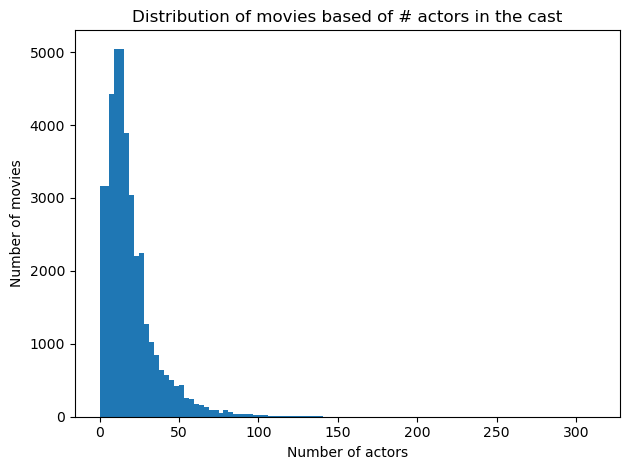

In [24]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.hist(num_actors, bins=100)
plt.title("Distribution of movies based of # actors in the cast")
plt.xlabel("Number of actors")
plt.ylabel("Number of movies")
# plt.xlim([0,10])
plt.show()

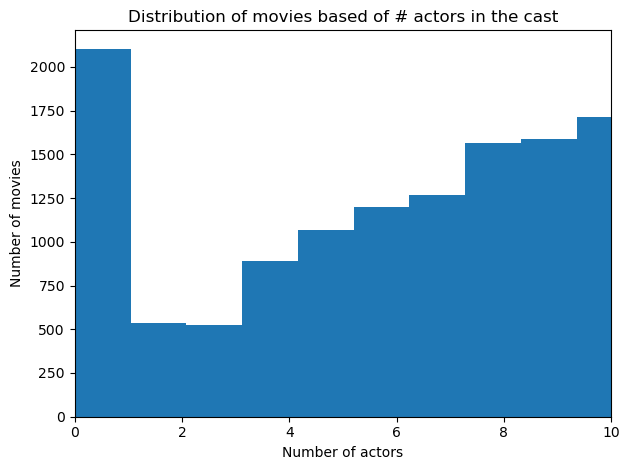

In [25]:
fig, axs = plt.subplots(1, 1, tight_layout=True)
axs.hist(num_actors, bins=300)
plt.title("Distribution of movies based of # actors in the cast")
plt.xlabel("Number of actors")
plt.ylabel("Number of movies")
plt.xlim([0,10])
plt.show()

### Notes:
* We would only loose ~2,500 movies out of 39,000 if we constrain on each movie having at least 3 actors.
* We decided to not use any other department beside acting because they were very sparse.

### Analysis TODO:
* Calculate distribution of actors by the number of movies they appear in
* Deside on a "appearance" threshold by which we will liter actors
* Leave the actor columns empty for now if all that movie's actors get filtered

In [19]:
data = data[data['casts'].notna()]
len(data)

39620

#### Top 3 Actors
* Creates a dictionary of size 43,116

In [20]:
new_actor_col_t3 = []
for i, row in data.iterrows():
#     try:
    cast = ast.literal_eval(row['casts'])['cast']
    actors_ = [x['name'] for x in cast if x['known_for_department'] == 'Acting'][:3]
    new_actor_col_t3.append(actors_)
#     except:
#         actors.append(pd.NA)

In [21]:
len(new_actor_col_t3), len(data)

(39620, 39620)

In [22]:
new_actor_col_t3[0]

['Tom Hanks', 'Tim Allen', 'Don Rickles']

In [23]:
all_unique_actors_t3 = set([item for sublist in new_actor_col_t3 for item in sublist])
len(all_unique_actors_t3)

43116

In [24]:
actor_dict_t3 = {}
for i, x in enumerate(all_unique_actors_t3):
    actor_dict_t3[x] = i

In [25]:
# saving actor dictionary:
act_f_t3 = "actors_top3_dict.json"
with open(act_f_t3, 'w') as outfile:
    json.dump(actor_dict_t3, outfile)

#### Looking at distribution of actor features in movie dataset

In [26]:
d_ = pd.Series([item for sublist in new_actor_col_t3 for item in sublist])

<AxesSubplot: >

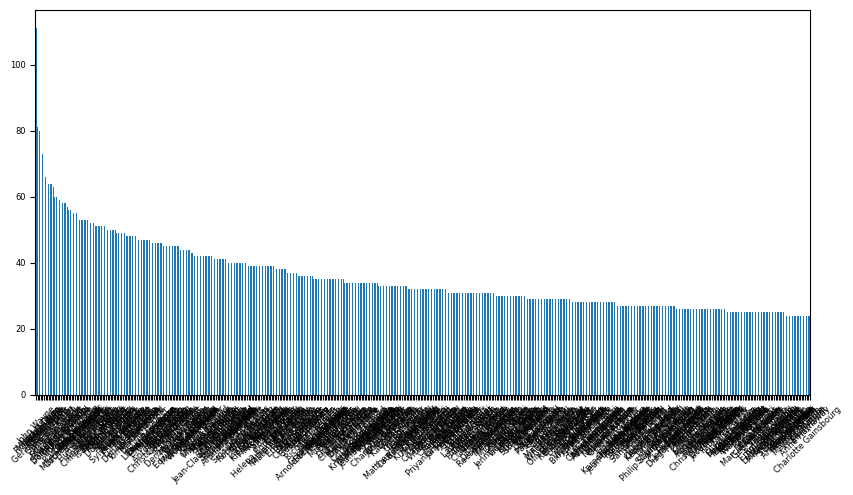

In [27]:
plt.rcParams.update({'font.size': 6})
d_.value_counts()[:500].plot(kind='bar', figsize=(10,5), rot=45)

#### Top 2 Actors
* Creates a dictionary of size 30168

In [28]:
new_actor_col_t2 = []
for i, row in data.iterrows():
    cast = ast.literal_eval(row['casts'])['cast']
    actors_ = [x['name'] for x in cast if x['known_for_department'] == 'Acting'][:2]
    new_actor_col_t2.append(actors_)

In [29]:
len(new_actor_col_t2), len(data)

(39620, 39620)

In [30]:
new_actor_col_t2[0]

['Tom Hanks', 'Tim Allen']

In [31]:
all_unique_actors_t2 = set([item for sublist in new_actor_col_t2 for item in sublist])
len(all_unique_actors_t2)

30168

In [32]:
actor_dict_t2 = {}
for i, x in enumerate(all_unique_actors_t2):
    actor_dict_t2[x] = i

In [33]:
# saving actor dictionary:
act_f_t2 = "actors_top2_dict.json"
with open(act_f_t2, 'w') as outfile:
    json.dump(actor_dict_t2, outfile)

#### Top 1 Actor
* Creates a dictionary of size 16388

In [34]:
new_actor_col_t1 = []
for i, row in data.iterrows():
    cast = ast.literal_eval(row['casts'])['cast']
    actors_ = [x['name'] for x in cast if x['known_for_department'] == 'Acting'][:1]
    new_actor_col_t1.append(actors_)

In [35]:
len(new_actor_col_t1), len(data)

(39620, 39620)

In [36]:
new_actor_col_t1[0]

['Tom Hanks']

In [37]:
all_unique_actors_t1 = set([item for sublist in new_actor_col_t1 for item in sublist])
len(all_unique_actors_t1)

16388

In [38]:
actor_dict_t1 = {}
for i, x in enumerate(all_unique_actors_t1):
    actor_dict_t1[x] = i

In [39]:
# saving actor dictionary:
act_f_t1 = "actors_top1_dict.json"
with open(act_f_t1, 'w') as outfile:
    json.dump(actor_dict_t1, outfile)

In [40]:
# data = data.rename(columns={'Actors': 'Actors_top3'})
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,revenue,runtime,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,5.243183,-0.554372,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,3.629983,0.258067,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,0.842709,0.152097,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,0.987697,1.070506,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,0.916922,0.328714,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808


In [41]:
len(data)

39620

#### Augmented Actor Dictionary
Threshold at 40 appearances creates a dictionary of size 136

In [42]:
df_ = d_.value_counts().rename_axis('actors').reset_index(name='counts')
df_.head()

,actors,counts
0,John Wayne,111
1,Robert De Niro,81
2,Michael Caine,80
3,Gérard Depardieu,77
4,Jackie Chan,73


In [43]:
len(df_.loc[df_['counts'] >= 40])

136

In [44]:
act_new = []
for i, row in df_.iterrows():
    if row['counts'] >= 40:
        act_new.append(row['actors'])
    else:
        act_new.append('other')
actors_in_dict = set(act_new)

In [45]:
aug_actor_dict = {}
for i, x in enumerate(actors_in_dict):
    aug_actor_dict[x] = i

In [113]:
# saving actor dictionary:
act_f = "augmented_actors_dict.json"
with open(act_f, 'w') as outfile:
    json.dump(aug_actor_dict, outfile)

#### Saving encoded actor ids per column:

In [51]:
# top 3
act_idx_t3 = []
act_idx_t2 = []
act_idx_t1 = []

for i in range(len(data)):
    t3_ = [aug_actor_dict[x] if x in act_new else aug_actor_dict['other'] for x in new_actor_col_t3[i]]
    t2_ = [aug_actor_dict[x] if x in act_new else aug_actor_dict['other'] for x in new_actor_col_t2[i]]
    t1_ = [aug_actor_dict[x] if x in act_new else aug_actor_dict['other'] for x in new_actor_col_t1[i]]
    
    act_idx_t3.append(t3_)
    act_idx_t2.append(t2_)
    act_idx_t1.append(t1_)

In [52]:
data['Actors_top3'] = act_idx_t3
data['Actors_top2'] = act_idx_t2
data['Actors_top1'] = act_idx_t1

In [53]:
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,...,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations,Actors_top3,Actors_top2,Actors_top1
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",1995-10-30,...,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"[128, 114, 114]","[128, 114]",[128]
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",1995-12-15,...,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"[82, 114, 114]","[82, 114]",[82]
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",1995-12-22,...,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"[11, 92, 114]","[11, 92]",[11]
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",1995-12-22,...,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"[114, 114, 114]","[114, 114]",[114]
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",1995-12-08,...,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"[114, 114, 114]","[114, 114]",[114]


### release_date

In [54]:
from datetime import datetime
import time

In [55]:
dates = data['release_date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d') if type(x) != float else x)

In [56]:
dates.min(), dates.max()

(Timestamp('1874-12-09 00:00:00'), Timestamp('2022-12-14 00:00:00'))

In [57]:
decades = dates.map(lambda x: (x.year//10)*10)

In [58]:
decades.min(), decades.max()

(1870.0, 2020.0)

In [59]:
str(int(decades.min()))

'1870'

In [60]:
## working on bucketing dates in decades...
date_dict = {
    '1870': 0,
    '1880': 1,
    '1890': 2,
    '1900': 3,
    '1910': 4,
    '1920': 5,
    '1930': 6,
    '1940': 7,
    '1950': 8,
    '1960': 9,
    '1970': 10,
    '1980': 11,
    '1990': 12,
    '2000': 13,
    '2010': 14,
    '2020': 15
}

In [61]:
coded_dates = []
for d in decades:
    if pd.isnull(d):
        coded_dates.append(d)
    else:
        code = date_dict[str(int(d))]
        coded_dates.append(code)

In [62]:
data['release_date'] = coded_dates

In [63]:
# saving date dictionary:
date_f = "release_date_dict.json"
with open(date_f, 'w') as outfile:
    json.dump(date_dict, outfile)

In [64]:
len(data)

39620

In [65]:
data.head()

,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,release_date,...,tagline,vote_average,vote_count,casts,keywords,num_releases,num_translations,Actors_top3,Actors_top2,Actors_top1
0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",12.0,...,NaN,1.516530,11.230518,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"[128, 114, 114]","[128, 114]",[128]
1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",12.0,...,Roll the dice and unleash the excitement!,0.933025,6.413346,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"[82, 114, 114]","[82, 114]",[82]
2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",12.0,...,Still Yelling. Still Fighting. Still Ready for...,0.293721,-0.038351,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"[11, 92, 114]","[11, 92]",[11]
3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",12.0,...,Friends are the people who let you be yourself...,0.188499,-0.167241,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"[114, 114, 114]","[114, 114]",[114]
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",12.0,...,Just When His World Is Back To Normal... He's ...,0.126322,0.176225,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"[114, 114, 114]","[114, 114]",[114]


## Merging all data versions

In [93]:
data_v2 = pd.read_csv("../preprocessing_data_manasa.csv")

In [94]:
data_v2.head()

,Unnamed: 0,Title,imdbId,adult,budget,genres,original_language,original_title,popularity,production_companies,...,casts,keywords,num_releases,num_translations,Actors,Top Genre Index,Top Genre Indices,top_prod_company,all_prod_companies,all_keywords
0,0,Toy Story (1995),114709,0.0,1.344100,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",0.0,Toy Story,13.233161,"[{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...",...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 779, 'name': 'martial art...",2.198140,3.380860,"['Tom Hanks', 'Tim Allen', 'Don Rickles']",[2],"[2, 1, 7, 3]",[48],[48],"[22, 44, 12, 44, 44, 44, 44, 44, 44, 44, 44, 4..."
1,1,Jumanji (1995),113497,0.0,3.233367,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",0.0,Jumanji,0.497344,"[{'id': 559, 'logo_path': '/jqWioYeGSyTLuHth01...",...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 7035, 'name': 'giant inse...",3.041993,2.978730,"['Robin Williams', 'Kirsten Dunst', 'Bradley P...",[1],"[1, 8, 7]",[39],"[39, 48, 48]","[44, 44, 44, 44, 44, 44, 44]"
2,2,Grumpier Old Men (1995),113228,0.0,1.074205,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",0.0,Grumpier Old Men,0.061151,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 1495, 'name': 'fishing'},...",0.148783,1.370211,"['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']",[13],"[13, 3]",[45],"[45, 48]","[44, 44, 34, 44, 44, 44, 44, 44, 9, 44]"
3,3,Waiting to Exhale (1995),114885,0.0,0.588393,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0.0,Waiting to Exhale,0.180840,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",...,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","{'keywords': [{'id': 818, 'name': 'based on no...",0.148783,0.465419,"['Whitney Houston', 'Angela Bassett', 'Loretta...",[3],"[3, 6, 13]",[0],[0],"[1, 44, 44, 44]"
4,4,Father of the Bride Part II (1995),113041,0.0,-0.275271,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",0.0,Father of the Bride Part II,0.311671,"[{'id': 5842, 'logo_path': None, 'name': 'Sand...",...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","{'keywords': [{'id': 970, 'name': 'parent chil...",0.510435,1.671808,"['Steve Martin', 'Diane Keaton', 'Martin Short']",[3],"[3, 7]",[48],"[48, 38]","[26, 44, 44, 44, 44, 44, 44, 34, 32, 19, 44, 44]"


In [95]:
len(data_v2)

39030

In [96]:
new_cols = data[['imdbId', 'release_date', 'Actors_top3', 'Actors_top2', 'Actors_top1']]

In [97]:
new_cols

,imdbId,release_date,Actors_top3,Actors_top2,Actors_top1
0,114709,12.0,"[128, 114, 114]","[128, 114]",[128]
1,113497,12.0,"[82, 114, 114]","[82, 114]",[82]
2,113228,12.0,"[11, 92, 114]","[11, 92]",[11]
3,114885,12.0,"[114, 114, 114]","[114, 114]",[114]
4,113041,12.0,"[114, 114, 114]","[114, 114]",[114]
...,...,...,...,...,...
39619,83168,11.0,"[114, 114, 114]","[114, 114]",[114]
39620,82875,11.0,"[114, 114, 114]","[114, 114]",[114]
39621,815258,13.0,"[114, 114, 114]","[114, 114]",[114]
39622,79142,10.0,"[114, 114, 114]","[114, 114]",[114]


In [98]:
final_data = pd.merge(data_v2, new_cols, on='imdbId')

In [100]:
final_data.columns

Index(['Unnamed: 0', 'Title', 'imdbId', 'adult', 'budget', 'genres',
       'original_language', 'original_title', 'popularity',
       'production_companies', 'release_date_x', 'revenue', 'runtime',
       'tagline', 'vote_average', 'vote_count', 'casts', 'keywords',
       'num_releases', 'num_translations', 'Actors', 'Top Genre Index',
       'Top Genre Indices', 'top_prod_company', 'all_prod_companies',
       'all_keywords', 'release_date_y', 'Actors_top3', 'Actors_top2',
       'Actors_top1'],
      dtype='object')

In [105]:
final_data = final_data.drop(['Unnamed: 0', 'genres', 'production_companies', 'release_date_x', 'casts', 'keywords', 'Actors'], axis=1)
final_data = final_data.rename(columns={'release_date_y':'release_date', 'Top Genre Index':'top_genre_index', 'Top Genre Indices':'top_genre_indices', 'Actors_top3':'actors_top3', 'Actors_top2':'actors_top2', 'Actors_top1':'actor_top1'})
final_data.head()


,Title,imdbId,adult,budget,original_language,original_title,popularity,revenue,runtime,tagline,...,num_translations,top_genre_index,top_genre_indices,top_prod_company,all_prod_companies,all_keywords,release_date,actors_top3,actors_top2,actor_top1
0,Toy Story (1995),114709,0.0,1.344100,0.0,Toy Story,13.233161,5.243183,-0.554372,NaN,...,3.380860,[2],"[2, 1, 7, 3]",[48],[48],"[22, 44, 12, 44, 44, 44, 44, 44, 44, 44, 44, 4...",12.0,"[128, 114, 114]","[128, 114]",[128]
1,Jumanji (1995),113497,0.0,3.233367,0.0,Jumanji,0.497344,3.629983,0.258067,Roll the dice and unleash the excitement!,...,2.978730,[1],"[1, 8, 7]",[39],"[39, 48, 48]","[44, 44, 44, 44, 44, 44, 44]",12.0,"[82, 114, 114]","[82, 114]",[82]
2,Grumpier Old Men (1995),113228,0.0,1.074205,0.0,Grumpier Old Men,0.061151,0.842709,0.152097,Still Yelling. Still Fighting. Still Ready for...,...,1.370211,[13],"[13, 3]",[45],"[45, 48]","[44, 44, 34, 44, 44, 44, 44, 44, 9, 44]",12.0,"[11, 92, 114]","[11, 92]",[11]
3,Waiting to Exhale (1995),114885,0.0,0.588393,0.0,Waiting to Exhale,0.180840,0.987697,1.070506,Friends are the people who let you be yourself...,...,0.465419,[3],"[3, 6, 13]",[0],[0],"[1, 44, 44, 44]",12.0,"[114, 114, 114]","[114, 114]",[114]
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,0.0,Father of the Bride Part II,0.311671,0.916922,0.328714,Just When His World Is Back To Normal... He's ...,...,1.671808,[3],"[3, 7]",[48],"[48, 38]","[26, 44, 44, 44, 44, 44, 44, 34, 32, 19, 44, 44]",12.0,"[114, 114, 114]","[114, 114]",[114]


In [106]:
final_data.columns

Index(['Title', 'imdbId', 'adult', 'budget', 'original_language',
       'original_title', 'popularity', 'revenue', 'runtime', 'tagline',
       'vote_average', 'vote_count', 'num_releases', 'num_translations',
       'top_genre_index', 'top_genre_indices', 'top_prod_company',
       'all_prod_companies', 'all_keywords', 'release_date', 'actors_top3',
       'actors_top2', 'actor_top1'],
      dtype='object')

In [108]:
final_data.head(-5)

,Title,imdbId,adult,budget,original_language,original_title,popularity,revenue,runtime,tagline,...,num_translations,top_genre_index,top_genre_indices,top_prod_company,all_prod_companies,all_keywords,release_date,actors_top3,actors_top2,actor_top1
0,Toy Story (1995),114709,0.0,1.344100,0.0,Toy Story,13.233161,5.243183,-0.554372,NaN,...,3.380860,[2],"[2, 1, 7, 3]",[48],[48],"[22, 44, 12, 44, 44, 44, 44, 44, 44, 44, 44, 4...",12.0,"[128, 114, 114]","[128, 114]",[128]
1,Jumanji (1995),113497,0.0,3.233367,0.0,Jumanji,0.497344,3.629983,0.258067,Roll the dice and unleash the excitement!,...,2.978730,[1],"[1, 8, 7]",[39],"[39, 48, 48]","[44, 44, 44, 44, 44, 44, 44]",12.0,"[82, 114, 114]","[82, 114]",[82]
2,Grumpier Old Men (1995),113228,0.0,1.074205,0.0,Grumpier Old Men,0.061151,0.842709,0.152097,Still Yelling. Still Fighting. Still Ready for...,...,1.370211,[13],"[13, 3]",[45],"[45, 48]","[44, 44, 34, 44, 44, 44, 44, 44, 9, 44]",12.0,"[11, 92, 114]","[11, 92]",[11]
3,Waiting to Exhale (1995),114885,0.0,0.588393,0.0,Waiting to Exhale,0.180840,0.987697,1.070506,Friends are the people who let you be yourself...,...,0.465419,[3],"[3, 6, 13]",[0],[0],"[1, 44, 44, 44]",12.0,"[114, 114, 114]","[114, 114]",[114]
4,Father of the Bride Part II (1995),113041,0.0,-0.275271,0.0,Father of the Bride Part II,0.311671,0.916922,0.328714,Just When His World Is Back To Normal... He's ...,...,1.671808,[3],"[3, 7]",[48],"[48, 38]","[26, 44, 44, 44, 44, 44, 44, 34, 32, 19, 44, 44]",12.0,"[114, 114, 114]","[114, 114]",[114]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39610,Island of Blood (1982),229480,1.0,-0.275271,0.0,Island Of Blood,-0.446597,-0.198939,-0.519048,They came seeking fame and fortune! What they ...,...,-0.539905,[10],[10],[48],[48],"[44, 44]",11.0,"[114, 114, 114]","[114, 114]",[114]
39611,Slave Girls from Beyond Infinity (1987),93991,1.0,-0.270413,0.0,Slave Girls from Beyond Infinity,0.054012,-0.198939,-0.589695,Big Movie. Big Production. Big Girls.,...,-0.238308,[0],"[0, 1, 14]",[48],"[48, 48]","[44, 44, 44]",11.0,"[114, 114, 114]","[114, 114]",[114]
39612,Roller Blade Warriors: Taken by Force (1989),98216,1.0,-0.275271,0.0,Roller Blade Warriors: Taken by Force,-0.466662,-0.198939,-0.483725,NaN,...,-1.143100,[8],"[8, 14]",[48],[48],"[44, 44, 44, 44]",11.0,"[114, 114, 114]","[114, 114]",[114]
39613,Avenging Angel (1985),88757,1.0,-0.275271,0.0,Avenging Angel,-0.215438,-0.198939,-0.130491,It's 4 years later. She's graduating college. ...,...,0.063289,[0],"[0, 16]",[48],[48],"[44, 33]",11.0,"[114, 114, 114]","[114, 114]",[114]


In [107]:
len(final_data)

39620

In [109]:
final_data_ = final_data.dropna()

In [110]:
len(final_data)

39620

In [111]:
final_data['top_genre_index'].unique()

array(['[2]', '[1]', '[13]', '[3]', '[0]', '[7]', '[6]', '[4]', '[16]',
       '[8]', '[14]', '[9]', '[10]', '[5]', '[11]', '[]', '[12]', '[17]',
       '[18]', '[15]'], dtype=object)

In [112]:
out_f = 'final_preprocessed_data.csv'
final_data.to_csv(out_f, index=False)